In [1]:
%matplotlib inline

# DataProvider

In [2]:
import numpy as np

from dataprovider3 import Dataset
from dataprovider3 import emio

In [3]:
import os

base_dir = '~/Data_local/datasets/pinky/ground_truth'
base_dir = os.path.expanduser(base_dir)

def load_data(data_id):
    data_dir = os.path.join(base_dir, data_id)    

    # Image
    fpath = os.path.join(data_dir, 'img.h5')
    assert os.path.exists(fpath)
    img = emio.imread(fpath)
    img = (img/255.0).astype(np.float32)

    # Segmentation
    fpath = os.path.join(data_dir, 'seg.d10.b1.h5')
    assert os.path.exists(fpath)
    seg = emio.imread(fpath)

    # Mask    
    fpath = os.path.join(data_dir, 'msk_train.h5')
    if not os.path.exists(fpath):
        fpath = os.path.join(data_dir, 'msk.h5')
    assert os.path.exists(fpath)
    msk = emio.imread(fpath)
    
    return img, seg, msk

In [4]:
img, seg, msk = load_data('stitched_vol19-vol34')

In [5]:
import matplotlib.pyplot as plt

def plot_data(img, seg, msk):
    sz = 10
    fig = plt.figure(figsize=(sz,sz))

    plt.subplot(131)
    z = img.shape[-3]//2
    plt.imshow(img[z,:,:], cmap='gray')

    plt.subplot(132)
    z = img.shape[-3]//2
    plt.imshow(seg[z,:,:])

    plt.subplot(133)
    z = img.shape[-3]//2
    plt.imshow(msk[z,:,:], cmap='gray')
    plt.show()

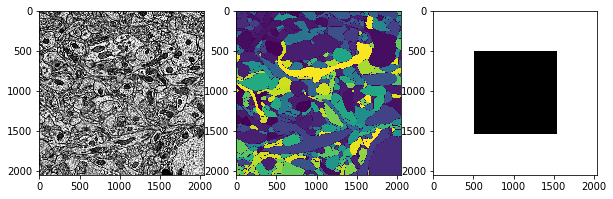

In [6]:
plot_data(img, seg, msk)

## Dataset

In [7]:
# Create Dataset.
dset = Dataset()
dset.add_data('img', img)
dset.add_data('seg', seg)
dset.add_mask('msk', msk, loc=True)

# Augmentor

## Box occlusion

In [8]:
import h5py

def save_sample(sample, fname='sample.h5'):
    with h5py.File(fname, 'w') as f:
        for k, v in sample.items():
            f.create_dataset(k, data=v)

In [75]:
import augmentor

aug = augmentor.NoiseBox(sigma=(1,3), dims=(10,50), margin=(1,10,10), density=0.3)
print(aug)

NoiseBox()


In [76]:
d = 256
spec = dict(img=(20,d,d), seg=(20,d,d), msk=(20,d,d))

In [77]:
import time

max_iter = 10
t0 = time.time()
for _ in range(max_iter):    
    spec2  = aug.prepare(dict(spec), imgs=['img'])
    sample = dset(spec=spec2)
    sample = aug(sample)
elapsed = time.time() - t0
print('{:.3f} s/iter'.format(elapsed/max_iter))

0.065 s/iter


In [78]:
save_sample(sample)